# Week 3 Assignment
## Overview
The following is a simple analysis of the GapMinder data set as part of the Coursera Data Analysis and Tools course.  In this analysis I will examine the relationship between the economic well-being of a society and the urbanization rate.  I will compute a Pearson's correlation coefficient for these two quantitative variables.

## About the Data
The data for this analysis comes from a subset of the GapMider project data.  In this section I will examine the variables I am interested in more detail.

### Income per Person
In order to measure the economic well-being I will be using GDP per capita data.  This originally came from the World Bank.  It is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.  The data are in constant 2000 US Dollars.  The GapMinder data set that I will be analyzing is the 2010 GDP per capita.

### Urbanization Rate
The urbanization rate is the urban population as a share of the 2008 total.  The urban population refers to people living in urban areas as defined by national statistical offices.  It is calculated using World Bank population estimates and urban ratios from the United Nations World Urbanization Prospects.

## Data Mangement
I begin by importing the libraries needed for the analysis:

In [1]:
%matplotlib inline
# Import libraries needed
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

Now I have python parse the csv file and print out some basic statistics about the data frame (df):

In [2]:
# Read in the GapMinder Data
print('Reading in GapMinder data')
df = pd.read_csv('gapminder.csv', low_memory=False)
# Print some basic statistics about the GapMinder data
print('Number of observations: '+ str(len(df)) +' (rows)')
print('Number of variables: '+ str(len(df.columns)) +' (columns)')

Reading in GapMinder data
Number of observations: 213 (rows)
Number of variables: 16 (columns)


There are 213 observations with 16 variables in the data frame.  I will change data types and print out some statistics on missing values

In [3]:
# Change the data type for variables of interest
df['urbanrate'] = pd.to_numeric(df['urbanrate'], errors='coerce')
df['incomeperperson'] = pd.to_numeric(df['incomeperperson'], errors='coerce')
# Print out the counts of valid and missing rows
print ('Countries with an Urbanization Rate: ' + str(df['urbanrate'].count()) + ' out of ' + str(len(df)) + ' (' + str(len(df) - df['urbanrate'].count()) + ' missing)')
print ('Countries with a GDP Per Capita: ' + str(df['incomeperperson'].count()) + ' out of ' + str(len(df)) + ' (' + str(len(df) - df['incomeperperson'].count()) + ' missing)')

Countries with an Urbanization Rate: 203 out of 213 (10 missing)
Countries with a GDP Per Capita: 190 out of 213 (23 missing)


I will select a subset of the data frame with those cases with complete data for the urbanization rate and economic well-being:

In [4]:
# Get the subset of complete data cases
print('Dropping rows with missing urbanization rate and per capita GDP')
subset = df[['urbanrate','incomeperperson']].dropna()
# Print more statistics
print('Number of observations: '+ str(len(subset)) +' (rows)')

Dropping rows with missing urbanization rate and per capita GDP
Number of observations: 189 (rows)


189 of the initial 213 records have complete data.

## Pearson's Correlation Coefficient

In [5]:
print ('Association Between Urbanization Rate and Economic Well-Being')
r = scipy.stats.pearsonr(subset['urbanrate'], subset['incomeperperson'])
print (r)
r_squared = r[0] * r[0]
print('R Squared = '+str(r_squared))

Association Between Urbanization Rate and Economic Well-Being
(0.4900942422598874, 8.202764568265684e-13)
R Squared = 0.240192366296


We observe that there is a small positive correlation (0.49) between the two variables that is statistically significant.  This relationship explains 24% of the variation.

## Visualization
Although not technically part of the assignment I wanted to visualize this relationship:

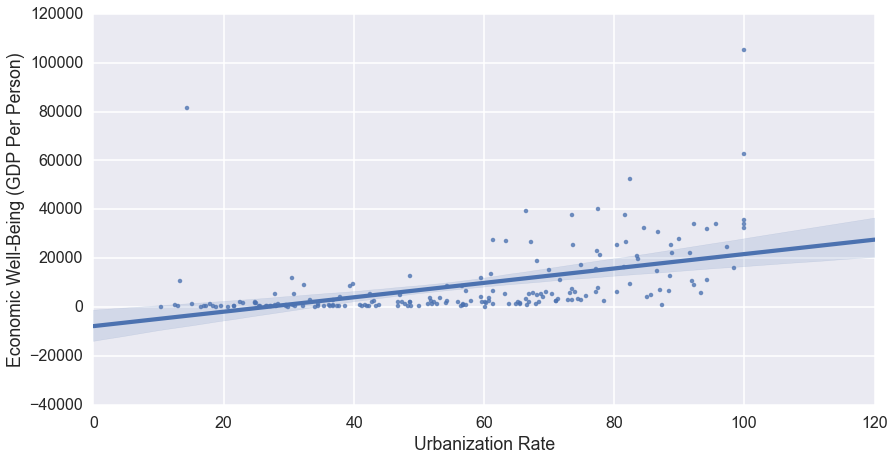

In [6]:
# Visualize the data
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.regplot(x="urbanrate", y="incomeperperson", data=subset)
plt.ylabel('Economic Well-Being (GDP Per Person)')
plt.xlabel('Urbanization Rate')

One can clearly observe that there is a slight positive relationship between these two variables.